## Q: 3
#### Part:- 1
Train on MNIST dataset using an MLP. The original training dataset contains 60,000 images and test contains 10,000 images. If you are short on compute, use a stratified subset of a smaller number of images. But, the test set remains the same 10,000 images. Compare against RF and Logistic Regression models.  The metrics can be: F1-score, confusion matrix. What do you observe? What all digits are commonly confused? 


#### - Importing Libraries 

In [2]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input , Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Do not pass an `input_shape`/`input_dim` argument to a layer.*")


#### - MNIST data loading and Normalization

In [3]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Standardize the dataset
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = y_train

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the training data
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
y_train = y_train[indices]

print("Data has been shuffled.")

Data has been shuffled.


#### - Plotting some images of MNIST Dataset 

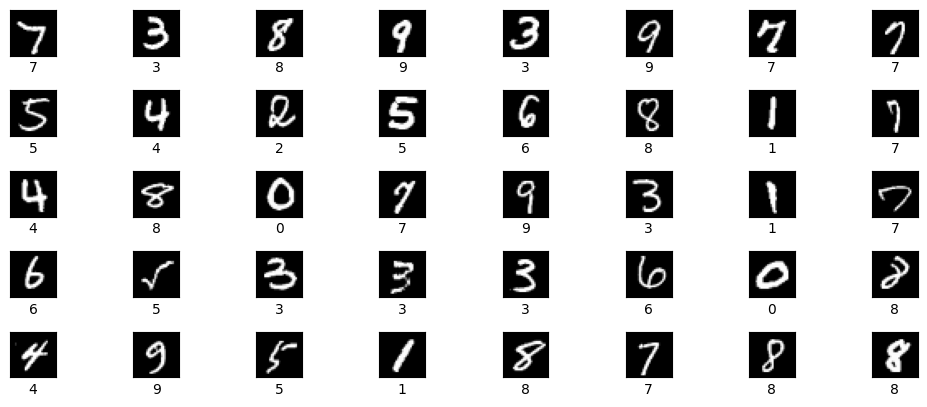

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10 , 8))
for i in range(40):
    ax = fig.add_subplot(10 , 8 , i+1)
    ax.imshow(X_train[i] , cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_train[i])
plt.tight_layout()
plt.show()

#### - MLP Model train on MNIST data and Evaluate 

In [5]:
# Define the MLP model with 30-20-10 structure
inputs = Input(shape=(28, 28))  # Assuming input shape of 28x28 for MNIST-like data
x = Flatten()(inputs)
x = Dense(128, activation='relu', name="first_layer")(x)
x = Dense(62, activation='relu', name="second_layer")(x)
outputs = Dense(10, activation='softmax')(x)

# Define and compile the trained model
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10)

# Evaluate MLP
mlp_pred = np.argmax(model.predict(X_test), axis=-1)
mlp_f1 = f1_score(y_test, mlp_pred, average='weighted')
mlp_confusion = confusion_matrix(y_test, mlp_pred)

model.summary()


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8416 - loss: 0.5471 - val_accuracy: 0.9521 - val_loss: 0.1633
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1298 - val_accuracy: 0.9643 - val_loss: 0.1173
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0841 - val_accuracy: 0.9697 - val_loss: 0.1002
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0617 - val_accuracy: 0.9678 - val_loss: 0.1040
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9725 - val_loss: 0.0912
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9895 - loss: 0.0354 - val_accuracy: 0.9739 - val_loss: 0.0896
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0308 - val_accuracy: 0.9737 - val_loss: 0.0920
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0230 - val_accuracy: 0.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ first_layer (Dense)                  │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 62)                  │           7,998 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             630 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 327,326 (1.25 MB)

 Trainable params: 109,108 (426.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,218 (852.42 KB)

#### - Reshape data for Random Forest and Logistic Regression

In [6]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)
X_train_flat = X_train_flat[:30000 ,:]
X_test_flat = X_test_flat[:30000 ,:]
y_for_trained = y_train[:30000] 


#### - Train Random Forest and LogisticRegression


In [7]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X_train_flat, y_for_trained)

# Evaluate RF
rf_pred = rf_model.predict(X_test_flat)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_confusion = confusion_matrix(y_test, rf_pred)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_flat, y_for_trained)

# Evaluate LR
lr_pred = lr_model.predict(X_test_flat)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_confusion = confusion_matrix(y_test, lr_pred)

#### - Print F1 Scores 

In [8]:
print("MLP F1 Score:", mlp_f1)
print("Random Forest F1 Score:", rf_f1)
print("Logistic Regression F1 Score:", lr_f1)

MLP F1 Score: 0.9760915810671559
Random Forest F1 Score: 0.9606623923659701
Logistic Regression F1 Score: 0.9183278238638138


#### - Plot confusion matrix 

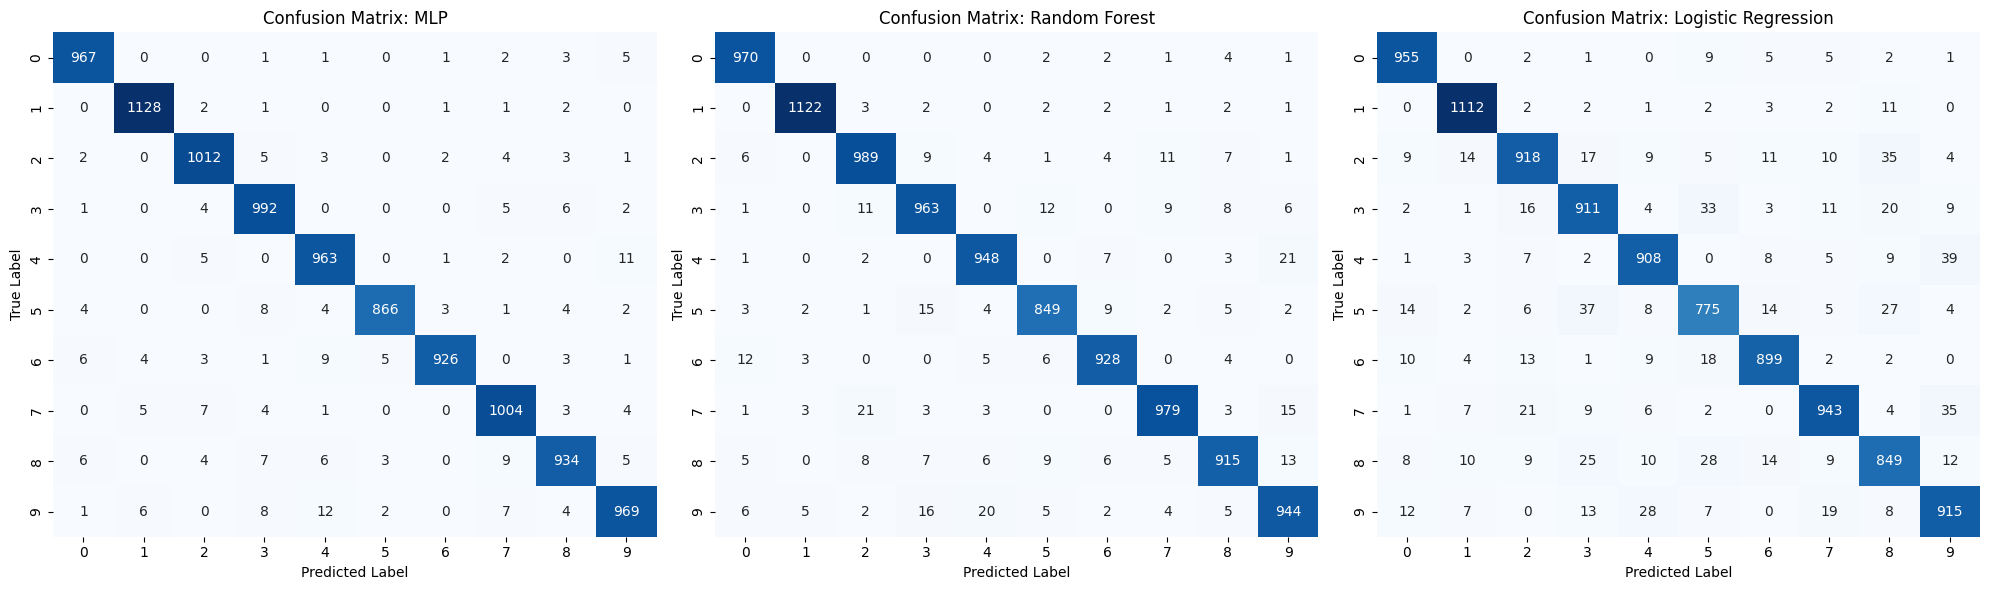

In [9]:
def plot_confusion_matrix(confusion_matrix, model_name, subplot_index):
    plt.subplot(1, 3, subplot_index)  # Create a 1x3 grid and select the subplot index
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Plotting confusion matrices side by side
plt.figure(figsize=(20, 6)) 
plot_confusion_matrix(mlp_confusion, "MLP", 1)
plot_confusion_matrix(rf_confusion, "Random Forest", 2)
plot_confusion_matrix(lr_confusion, "Logistic Regression", 3)
plt.tight_layout()
plt.show()


### Observations:
- Performance Comparison: Expect higher F1 scores for MLP and Random Forest on MNIST, with Logistic Regression generally lower due to its linear nature.
- Confused Digits: Analyze confusion matrices for digits like '3' and '5' or '4' and '9', '5' and '8'  etc  which are visually similar.


### Part B

- Let us assume your MLP has 30 neurons in first layer, 20 in second layer and then 10 finally for the output layer (corresponding to 10 classes). On the trained MLP, plot the t-SNE for the output from the layer containing 20 neurons for the 10 digits. Contrast this with the t-SNE for the same layer but for an untrained model. What do you conclude? 

#### -  Create a model that outputs from the second layer & apply t-SNE 

In [10]:

untrained_inputs = Input(shape=(28, 28))
x_untrained = Flatten()(untrained_inputs)
x_untrained = Dense(30, activation='relu', name="first_layer_untrained")(x_untrained)
x_untrained = Dense(20, activation='relu', name="second_layer_untrained")(x_untrained)
outputs_untrained = Dense(10, activation='softmax')(x_untrained)
untrained_model = Model(inputs=untrained_inputs, outputs=outputs_untrained)

# Extract the intermediate outputs from the second layer (20 neurons) of both models
second_layer_model = Model(inputs=model.input, outputs=model.get_layer("second_layer").output)
second_layer_untrained_model = Model(inputs=untrained_model.input, outputs=untrained_model.get_layer("second_layer_untrained").output)

# Get activations for t-SNE
activations_trained = second_layer_model.predict(X_test)
activations_untrained = second_layer_untrained_model.predict(X_test)

# Apply t-SNE for dimensionality reduction
tsne_trained = TSNE(n_components=2, random_state=42).fit_transform(activations_trained)
tsne_untrained = TSNE(n_components=2, random_state=42).fit_transform(activations_untrained)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step


#### - Plot t-SNE of MLP Second Layer Outputs [ for Trained and Untrained model ]

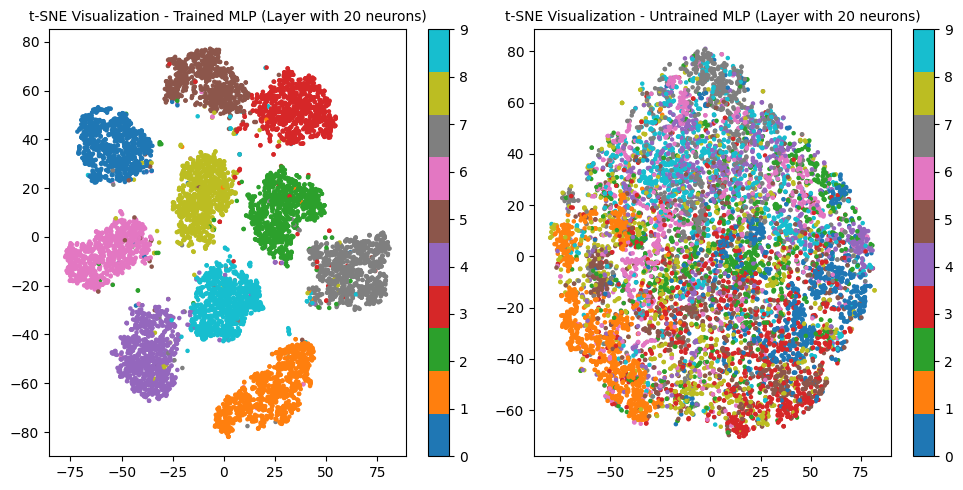

In [11]:
# Plotting the t-SNE for trained and untrained models
plt.figure(figsize=(10, 5))

# Plot for trained model
plt.subplot(1, 2, 1)
plt.scatter(tsne_trained[:, 0], tsne_trained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization - Trained MLP (Layer with 20 neurons)" , fontsize = 10)

# Plot for untrained model
plt.subplot(1, 2, 2)
plt.scatter(tsne_untrained[:, 0], tsne_untrained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization - Untrained MLP (Layer with 20 neurons)" , fontsize = 10)
plt.tight_layout()
plt.show()

#### Part 3 
Now, use the trained MLP to predict on the Fashion-MNIST dataset. What do you observe? How do the embeddings (t-SNE viz for the second layer compare for MNIST and Fashion-MNIST images)

#### - Load and Standardize the Fashion-MNIST dataset

In [12]:
# Load Fashion-MNIST dataset
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = keras.datasets.fashion_mnist.load_data()

# Standardize the dataset
X_fashion_train = X_fashion_train/255.0
X_fashion_test = X_fashion_test/255.0

#### - Plotting some images of F-MNIST Dataset 

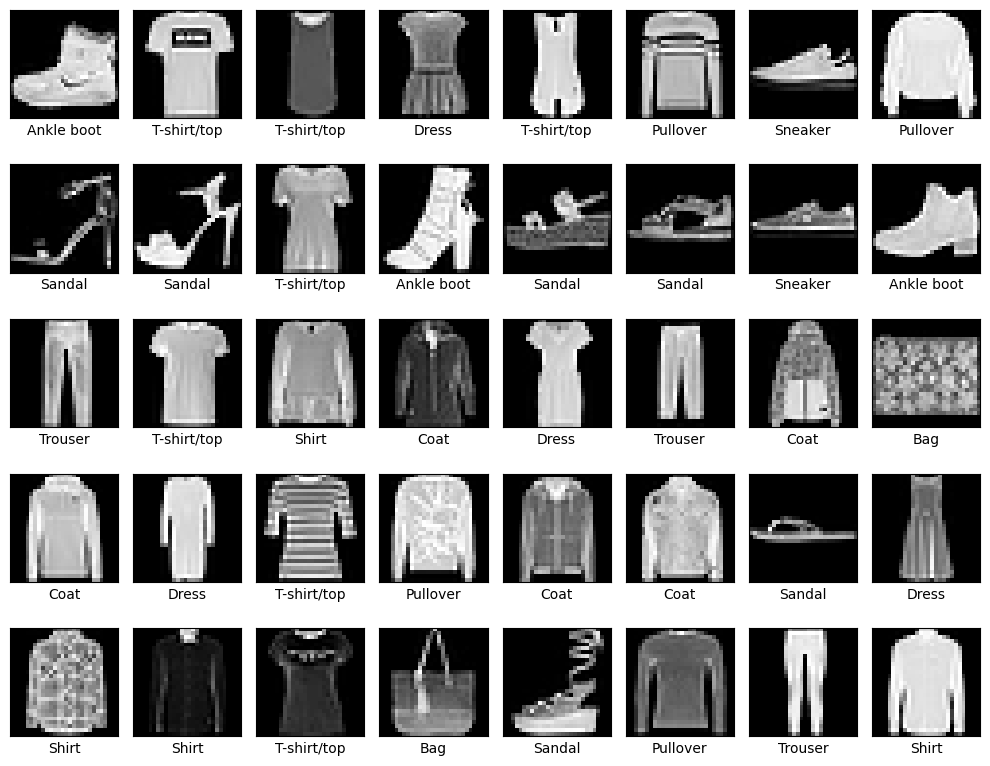

In [13]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

fig = plt.figure(figsize =(10 , 8))
for i in range(40):
    ax = fig.add_subplot(5 , 8 , i+1)
    ax.imshow(X_fashion_train[i] , cmap='grey')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(fashion_labels[y_fashion_train[i]])
plt.tight_layout()
plt.show()

#### - Predict using trained MLP and apply t- SNE to the outputs of F-MNIST datasets


In [39]:
# Predict using the trained MLP
fashion_predictions = np.argmax(model.predict(X_fashion_test), axis=-1)
fashion_f1 = f1_score(y_fashion_test, fashion_predictions, average='weighted')
fashion_confusion = confusion_matrix(y_fashion_test, fashion_predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step


#### -  F-Score for predicting F-MNIST data using trined MLP model on MNIST data

In [41]:
print(f'F1-Score for F-MNIST data = {fashion_f1}')

F1-Score for F-MNIST data = 0.05378725420103575


* we can see that F-Score is very low and that is not surprising as we have trained model on 1-9 digits and and trying to predit the data that contains images of Fashion data(like Tshirt , boots , Trousers etc.)

#### - Plot Confusion Matrix

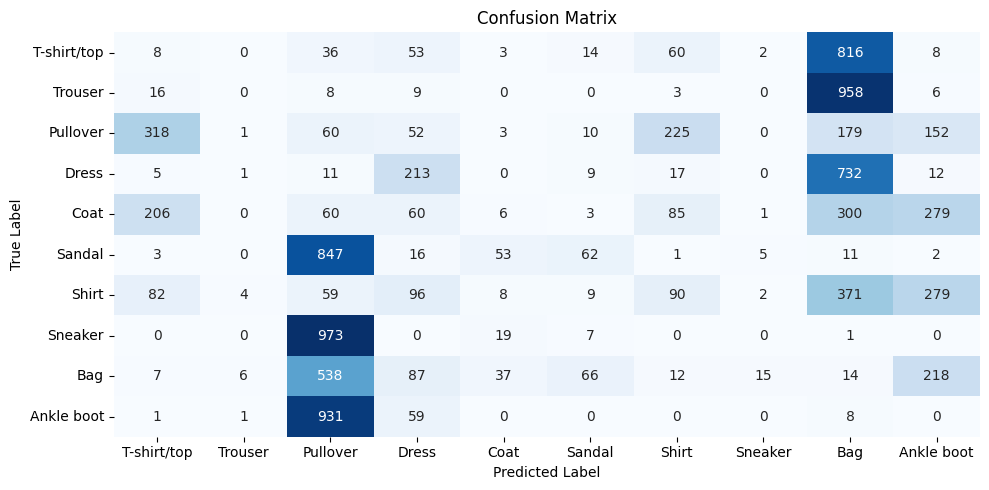

In [30]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize = (10, 5))
sns.heatmap(fashion_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=fashion_labels, yticklabels=fashion_labels)
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### - Apply t-SNE on the the F-MNIST data and compare with t-SNE for MNIST data

In [15]:
activations_trained = second_layer_model.predict(X_fashion_test)

tsne_fashion_trained = TSNE(n_components=2, random_state=42).fit_transform(activations_trained)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


#### -  Plot the t-SNE results for Fashion-MNIST and MNIST

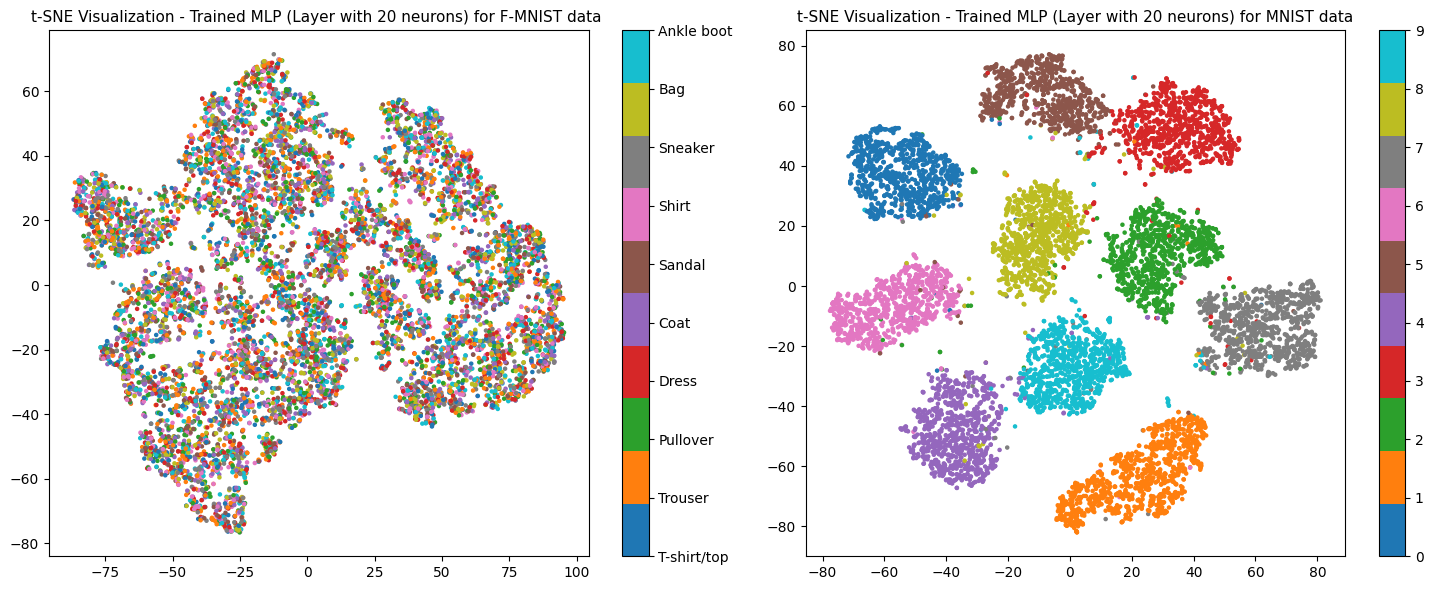

In [38]:
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(15, 6))

# Plot for trained model
plt.subplot(1, 2, 1)
plt.scatter(tsne_fashion_trained[:, 0], tsne_fashion_trained[:, 1], c=y_test, cmap='tab10', s=5)
cbar = plt.colorbar(ticks=range(10))
cbar.ax.set_yticklabels(fashion_labels) 
plt.title("t-SNE Visualization - Trained MLP (Layer with 20 neurons) for F-MNIST data " , fontsize = 11)

# Plot for trained model
plt.subplot(1, 2, 2)
plt.scatter(tsne_trained[:, 0], tsne_trained[:, 1], c=y_test, cmap='tab10', s=5)
plt.colorbar()
plt.title("t-SNE Visualization - Trained MLP (Layer with 20 neurons) for MNIST data" , fontsize = 11)

plt.tight_layout()
plt.show()

#### Here we can see that in t-SNE for F-MNIST data there is no cluture formation  because our model is trained on MNIST dataset that contains only digits. So model not able to form accurate discision boundaries hence we are getting random embbeding 